# Human life  Analysis in different Countries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
pd.options.mode.chained_assignment = None 

In [2]:
df=pd.read_csv("D:\Data_Analysis\WBI.csv")
df=df.fillna(0)




In [3]:
q1=df[['Country Name','Health: Life expectancy at birth, female (years)']]


# What is the average life expectancy at birth for women of different countries?

In [4]:
q1.groupby('Country Name').mean('Health: Life expectancy at birth, female (years)')

,"Health: Life expectancy at birth, female (years)"
Country Name,
Afghanistan,46.727273
Albania,79.090909
Algeria,72.909091
American Samoa,0.000000
Andorra,0.000000
...,...
Virgin Islands (U.S.),81.181818
West Bank and Gaza,73.363636
"Yemen, Rep.",64.000000


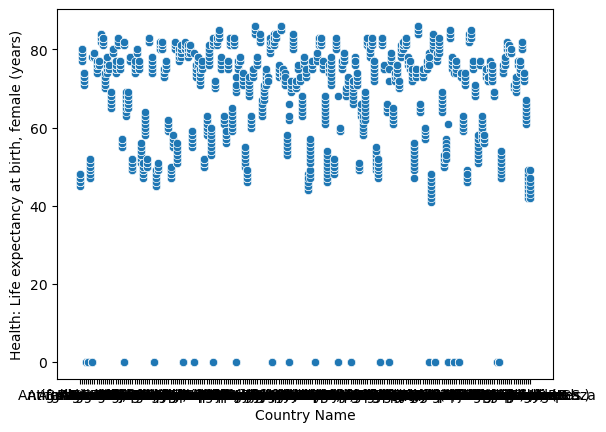

In [5]:
sns.scatterplot(data=q1,x='Country Name',y='Health: Life expectancy at birth, female (years)')
plt.rcParams["figure.figsize"] = (8, 4)

In [6]:
q1['Health: Life expectancy at birth, female (years)'].unique()

array([45., 46., 47., 48., 77., 78., 79., 80., 71., 72., 73., 74.,  0.,
       49., 50., 51., 52., 75., 76., 82., 83., 84., 81., 70., 65., 66.,
       67., 68., 69., 55., 56., 57., 63., 64., 53., 54., 58., 59., 60.,
       61., 62., 85., 86., 44., 41., 42., 43.])

# What is the correlation between the number of mobile phone subscribers and the number of internet users?


In [7]:
q2=df[['Business: Mobile phone subscribers','Business: Internet users (per 100 people)','Population: Total (count)']]


In [8]:
q2['Business: Mobile phone subscribers']=q2['Business: Mobile phone subscribers'].str.replace(",",'').astype('float')
q2['Population: Total (count)']=q2['Population: Total (count)'].str.replace(",",'').astype('float')
q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Business: Mobile phone subscribers         2214 non-null   float64
 1   Business: Internet users (per 100 people)  2354 non-null   float64
 2   Population: Total (count)                  2354 non-null   float64
dtypes: float64(3)
memory usage: 55.3 KB


In [9]:
q2['Internet users']=(q2['Population: Total (count)']/100)*q2['Business: Internet users (per 100 people)']

In [10]:
Q2=q2[['Business: Mobile phone subscribers','Internet users']]

In [11]:
Q=Q2.corr()

In [12]:
Q.style.background_gradient(cmap="coolwarm")

,Business: Mobile phone subscribers,Internet users
Business: Mobile phone subscribers,1.000000,0.857340
Internet users,0.857340,1.000000


## Strong Correlation between Mobile subscribers and Internet users

# What is the difference in the average GDP per capita between urban and rural areas?

In [13]:
q3=df[['Country Name','Population: Total (count)','Population: Urban (count)','Finance: GDP (current US$)']]
q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Country Name                2354 non-null   object
 1   Population: Total (count)   2354 non-null   object
 2   Population: Urban (count)   2354 non-null   object
 3   Finance: GDP (current US$)  2354 non-null   object
dtypes: object(4)
memory usage: 73.7+ KB


In [14]:
q3['Population: Total (count)']=q3['Population: Total (count)'].str.replace(',','').astype('float')
q3['Population: Urban (count)']=q3['Population: Urban (count)'].str.replace(',','').astype('float')
q3['Finance: GDP (current US$)']=q3['Finance: GDP (current US$)'].str.replace(',','').astype('float')


In [15]:
q3['rural(count)']=q3['Population: Total (count)']-q3['Population: Urban (count)']

In [16]:
q3['Rural GDP']=q3['Finance: GDP (current US$)']/q3['rural(count)']
q3['Urban GDP']=q3['Finance: GDP (current US$)']/q3['Population: Urban (count)']

In [17]:
q3=q3.groupby('Country Name').mean(['Rural GDP','Urban GDP']).reset_index()

In [18]:
Q3=q3[['Country Name']]
Q3['Difference B/W Urban and Rural GDP']=q3['Urban GDP']-q3['Rural GDP']
Q3=Q3.fillna(0)
Q3

,Country Name,Difference B/W Urban and Rural GDP
0,Afghanistan,790.658929
1,Albania,935.352695
2,Algeria,-3784.730293
3,American Samoa,0.000000
4,Andorra,-279908.743882
...,...,...
209,Virgin Islands (U.S.),0.000000
210,West Bank and Gaza,-2269.176587
211,"Yemen, Rep.",1657.707543
212,Zambia,919.177522


<Axes: xlabel='Country Name', ylabel='Difference B/W Urban and Rural GDP'>

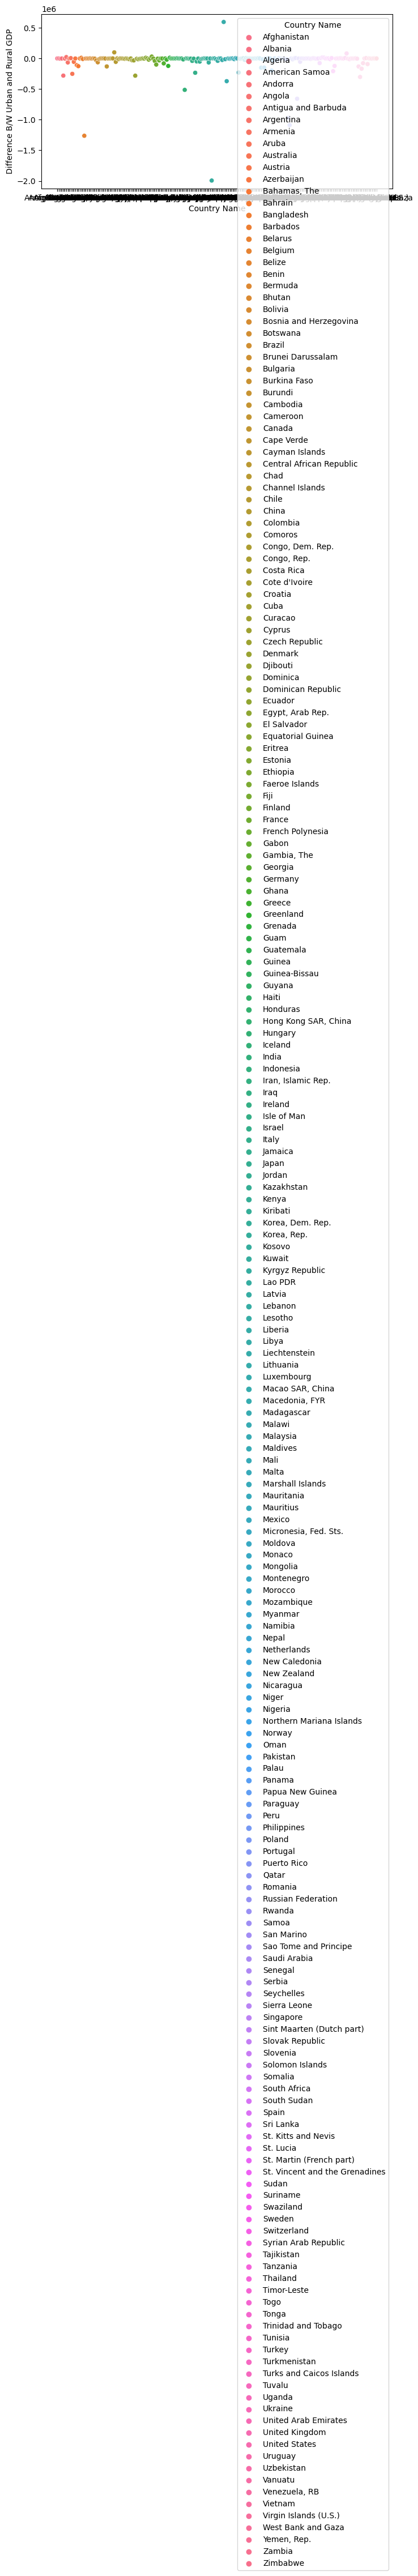

In [19]:
sns.scatterplot(data=Q3,x='Country Name',y='Difference B/W Urban and Rural GDP',hue='Country Name')

<Axes: >

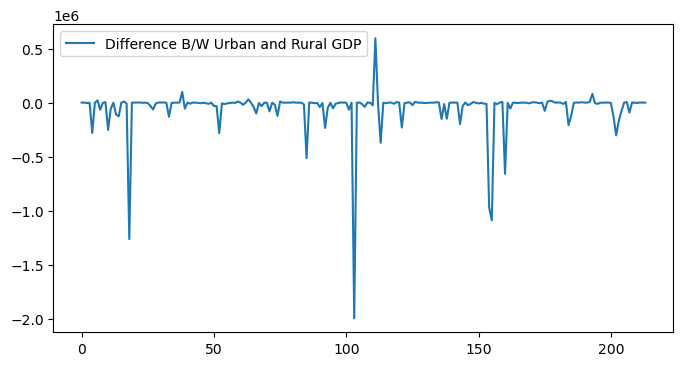

In [20]:
sns.lineplot(data=Q3)


# Find top five countries with the highest number of passenger cars per 1,000 people?

In [21]:
q4=df.loc[df.groupby(['Country Name'])['Transit: Passenger cars (per 1,000 people)'].idxmax(),['Country Name','Transit: Passenger cars (per 1,000 people)']]


In [22]:
Q4=q4.sort_values('Transit: Passenger cars (per 1,000 people)',ascending=False).head(5)
Q4

,Country Name,"Transit: Passenger cars (per 1,000 people)"
1417,Monaco,771.0
1251,Luxembourg,673.0
942,Iceland,666.0
1526,New Zealand,616.0
1701,Puerto Rico,614.0


<Axes: xlabel='Country Name', ylabel='Transit: Passenger cars (per 1,000 people)'>

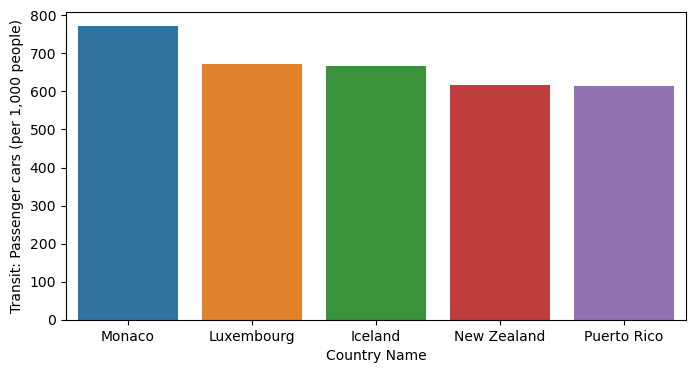

In [23]:
sns.barplot(data=Q4,x='Country Name',y='Transit: Passenger cars (per 1,000 people)')

# What are the top 5 countries with the highest life expectancy at birth?

In [24]:
q5=df[['Country Name','Health: Life expectancy at birth, total (years)']]
q5=q5.groupby('Country Name').mean('Health: Life expectancy at birth, total (years)').reset_index()
Q5=q5.sort_values('Health: Life expectancy at birth, total (years)',ascending=False).head(5)
Q5

,Country Name,"Health: Life expectancy at birth, total (years)"
95,Japan,82.181818
160,San Marino,82.000000
83,"Hong Kong SAR, China",81.818182
185,Switzerland,81.090909
85,Iceland,80.727273


<Axes: xlabel='Country Name', ylabel='Health: Life expectancy at birth, total (years)'>

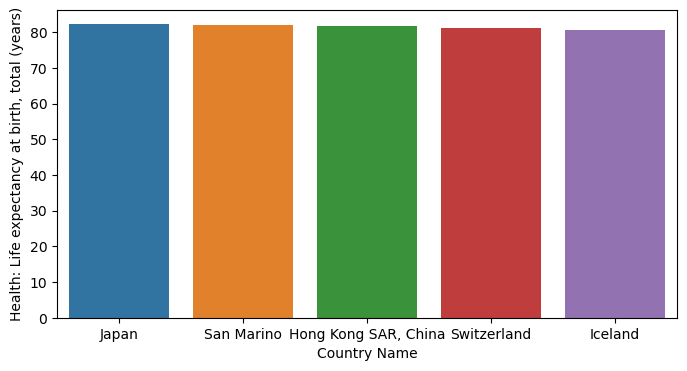

In [25]:
sns.barplot(data=Q5,x='Country Name',y='Health: Life expectancy at birth, total (years)')

# Name the countries with the highest and lowest GDP per capita?

In [30]:
q6=df[df['Finance: GDP per capita (current US$)'].str.contains('nan')==False]
q6['Finance: GDP per capita (current US$)']=q6['Finance: GDP per capita (current US$)'].str.replace(",",'').astype('float')

In [39]:
q6=q6.loc[q6.groupby('Country Name')['Finance: GDP per capita (current US$)'].idxmax(),['Country Name','Finance: GDP per capita (current US$)']]
Q6=q6.sort_values("Finance: GDP per capita (current US$)",ascending=False).head(5)
Q6

,Country Name,Finance: GDP per capita (current US$)
1416,Monaco,186243.0
1229,Liechtenstein,138775.0
1251,Luxembourg,118219.0
1581,Norway,95190.0
239,Bermuda,95170.0


<Axes: xlabel='Country Name', ylabel='Finance: GDP per capita (current US$)'>

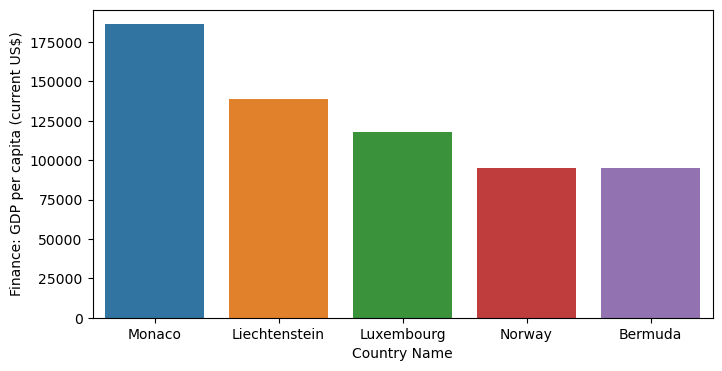

In [41]:
sns.barplot(data=Q6,x='Country Name',y='Finance: GDP per capita (current US$)')

# How does the GDP vary among different countries?

In [ ]:
# Differences in real GDP across countries can come from:
# Differences in population
# Differences in physical capital
# Differences in human capital
# Differences in technology

In [42]:
df

,Country Name,Date,"Transit: Railways, (million passenger-km)","Transit: Passenger cars (per 1,000 people)",Business: Mobile phone subscribers,Business: Internet users (per 100 people),"Health: Mortality, under-5 (per 1,000 live births)",Health: Health expenditure per capita (current US$),"Health: Health expenditure, total (% GDP)",Population: Total (count),Population: Urban (count),"Population:: Birth rate, crude (per 1,000)","Health: Life expectancy at birth, female (years)","Health: Life expectancy at birth, male (years)","Health: Life expectancy at birth, total (years)",Population: Ages 0-14 (% of total),Population: Ages 15-64 (% of total),Population: Ages 65+ (% of total),Finance: GDP (current US$),Finance: GDP per capita (current US$)
0,Afghanistan,7/1/2000,0,0.0,0,0.0,151.0,11,8.0,"25,950,816","5,527,524",51.0,45.0,45.0,45.0,48.0,50.0,2.0,0,0
1,Afghanistan,7/1/2001,0,0.0,0,0.0,150.0,11,9.0,"26,697,430","5,771,984",50.0,46.0,45.0,46.0,48.0,50.0,2.0,"2,461,666,315",92
2,Afghanistan,7/1/2002,0,0.0,"25,000",0.0,150.0,22,7.0,"27,465,525","6,025,936",49.0,46.0,46.0,46.0,48.0,50.0,2.0,"4,338,907,579",158
3,Afghanistan,7/1/2003,0,0.0,"200,000",0.0,151.0,25,8.0,"28,255,719","6,289,723",48.0,46.0,46.0,46.0,48.0,50.0,2.0,"4,766,127,272",169
4,Afghanistan,7/1/2004,0,0.0,"600,000",0.0,150.0,30,9.0,"29,068,646","6,563,700",47.0,46.0,46.0,46.0,48.0,50.0,2.0,"5,704,202,651",196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,Zimbabwe,7/1/2006,0,0.0,"849,146",10.0,97.0,0,0.0,"12,529,655","4,558,288",29.0,44.0,46.0,45.0,40.0,56.0,4.0,"5,443,896,500",434
2350,Zimbabwe,7/1/2007,0,98.0,"1,225,654",11.0,92.0,0,0.0,"12,481,245","4,600,587",29.0,45.0,47.0,46.0,40.0,56.0,4.0,"5,291,950,101",424
2351,Zimbabwe,7/1/2008,0,0.0,"1,654,721",11.0,88.0,0,0.0,"12,451,543","4,649,406",29.0,46.0,48.0,47.0,40.0,56.0,4.0,"4,415,702,801",355
2352,Zimbabwe,7/1/2009,0,0.0,"3,991,000",11.0,83.0,0,0.0,"12,473,992","4,717,664",29.0,47.0,49.0,48.0,39.0,57.0,4.0,"5,836,213,746",468
